In [1]:
import os
os.chdir('..')

In [2]:
import torch
import numpy as np
from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _box_plots

%load_ext autoreload
%autoreload 2

In [19]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN2_hyperparam_tuned', device)
GNN, args = load('GNN1_large_training_set', device)
GNN, args = load('GNN2_large_training_set', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:2


## Box plot baseline evaluation

#### Evaluate CRs on all graph configurations

In [20]:
rng = np.random.default_rng(seed=50)
num_trials = 100
batch_size = 500
node_configs = EXPERIMENT_BASE_TESTING_REGIMES
graph_configs = MAIN_TESTING_GRAPH_CONFIGS
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {},
    'naor_lp_rounding': {}
}

data = {node_config: {} for node_config in node_configs}

for node_config in node_configs:
    for graph_config in graph_configs:
            print(node_config, graph_config)
            instances = sample_instances(
                *node_config,
                num_trials,
                rng,
                args.__dict__,
                **graph_config
            )

            cr_ratios, _ = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[GNN],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=5,
                baselines=['greedy', 'greedy_t', 'lp_rounding', 'naor_lp_rounding'],
                **baselines_kwargs
            )

            data[node_config][str(graph_config)] = cr_ratios


(20, 10) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu

#### Generate box plots

{"{'graph_type': 'ER', 'p': 0.5, 'weighted': True}": {'learned': [0.9487959589761159, 0.9417008114177378, 0.9191704519340705, 0.8628104289427574, 0.907904896524012, 0.776739928603049, 0.9296652566332068, 0.8477591869432988, 0.9171408370228, 0.8231039239369607, 0.8490538262078496, 0.9239637031722003, 0.8952673582006367, 0.9024274805000866, 0.9171337279476786, 0.9476192818057193, 0.9310308180522316, 0.8986703562552396, 0.7833784246518516, 0.8463405142894764, 0.879338823609725, 0.9335075675807663, 0.876495693262709, 0.9412085293841589, 0.9807234281545844, 0.9013992739219372, 0.9526985385242239, 0.9438556926316736, 0.9430560035683893, 0.9030900728174899, 0.9516824798192622, 0.8077537157532063, 0.911359120308652, 0.8427156787813896, 0.8962507295233335, 0.8927224933621464, 0.8351059601735684, 0.7892728242726815, 0.955968403125517, 0.926113077735786, 0.9166466881329469, 0.9096127015494295, 0.8467634510797712, 0.8945120650226986, 0.9382030363099876, 0.9550549511021528, 0.9204279148764767, 0.92

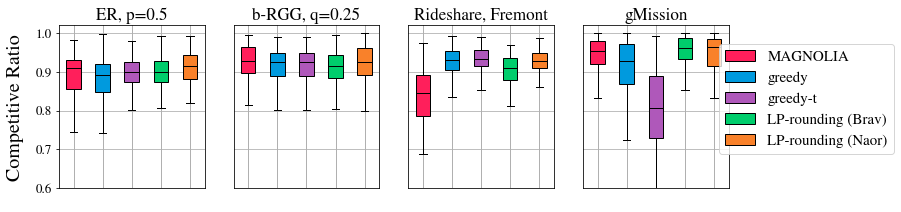

In [21]:
results = {}
for graph_type, val in data[EXPERIMENT_BASE_TESTING_REGIMES[0]].items():
	results[graph_type] = val
print(results)
_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

In [ ]:
from algorithms import greedy, offline_opt
from util import _flip_coins

rng = np.random.default_rng(seed=0)
instances = sample_instances(
    *(30, 10),
    100,
    rng,
    {},
    **MAIN_TESTING_GRAPH_CONFIGS[1]
)
vals = []
for instance in instances:
    vals2 = []
    for _ in range(5):
        coin_flips = _flip_coins(instance[1], rng)
        vals2.append(greedy(instance, coin_flips)[1] / offline_opt(instance[0], coin_flips)[1])
    vals.append(np.nanmean(vals2))
    

In [ ]:
np.min(vals)

In [ ]:
instances[0]